In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.patches as patches
import matplotlib as mpl

In [2]:
# Set the global font to Arial
mpl.rcParams['font.family'] = 'Arial'

In [3]:
# Load data from the Excel spreadsheet (replace 'your_data.xlsx' with your file path)
df = pd.read_excel('EDF6 Scatter.xlsx')

In [4]:
# Print all column names in the DataFrame
print(df.columns)


Index(['Compound', 'ADP-Glo IC50 / nM', 'ALIS Lowest Enzyme Conc. / μM',
       'Conversion / %', 'ADP-Glo Inhibition / %', 'Condition', 'X-Ray',
       'Label'],
      dtype='object')


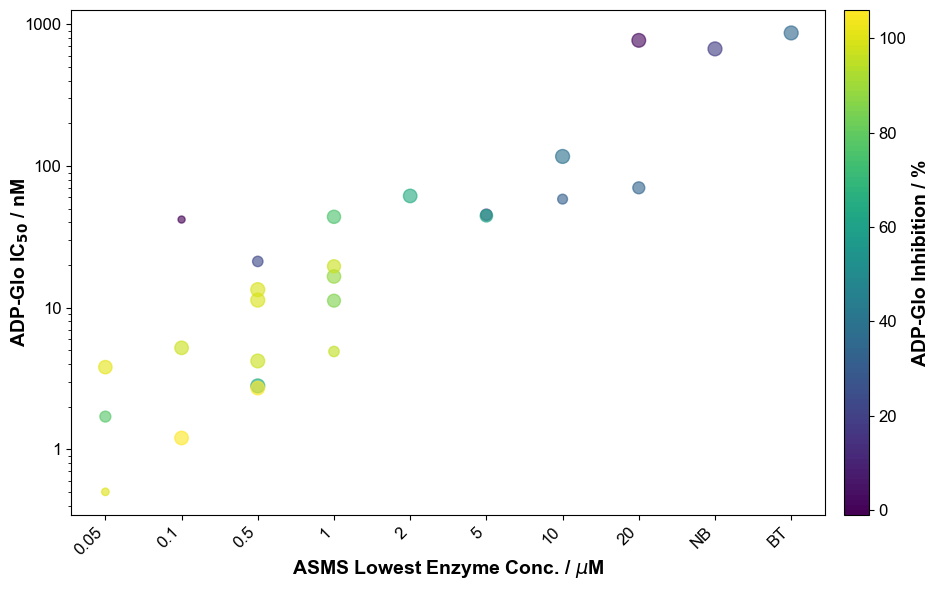

In [5]:
# Define the variables
x_variable = 'ALIS Lowest Enzyme Conc. / μM'
y_variable = 'ADP-Glo IC50 / nM'
z_variable = 'ADP-Glo Inhibition / %'
size_variable = 'Conversion / %'  # Added variable for dot size

# Create a logarithmic x-axis
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('viridis', 100)

# Create a numerical representation for categories
unique_categories = df[x_variable].unique()
category_mapping = {cat: idx + 1 for idx, cat in enumerate(unique_categories)}
df['CategoryNumeric'] = df[x_variable].map(category_mapping)

# Create the scatter plot with size variable
sc = plt.scatter(df['CategoryNumeric'], df[y_variable], c=df[z_variable], cmap=cmap, marker='o', s=df[size_variable], alpha=0.62)
#for index, row in df.iterrows():
#    if row['X-Ray'] == 'Y':
#       plt.scatter(row['CategoryNumeric'], row[y_variable], edgecolor='red', marker='o', s=2, alpha=0.62)
        
# Customize the plot
plt.xlabel(r'ASMS Lowest Enzyme Conc. / $\mathbf{\it{\mu}}$M', labelpad=0, fontweight='bold', fontname='Arial', fontsize=14)
plt.ylabel(r'ADP-Glo IC$_{\mathbf{50}}$ / nM', labelpad=-5, fontweight='bold', fontname='Arial', fontsize=14)

# Set the x-axis ticks and labels
plt.xticks(list(category_mapping.values()), list(category_mapping.keys()), rotation=45, ha='right', fontsize=12)

# Set the y-axis to a logarithmic scale with whole integer labels
plt.yscale('log')
plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'], fontsize=12)

# Add a color bar
cbar = plt.colorbar(sc, orientation='vertical', pad=0.02)
cbar.set_label('ADP-Glo Inhibition / %', fontweight='bold', fontsize=14)  # Set colorbar label to bold
cbar.ax.tick_params(labelsize=12)  # Set colorbar tick labels to fontsize 12
cbar.solids.set_alpha(1.00)

# Show the plot
plt.tight_layout()
#plt.show()
plt.savefig('EDF6 Scatter Plot',dpi=900)